In [72]:
include("mfpt.jl")

compare_results (generic function with 1 method)

In [82]:
seed = 1234
tau = 0.25
h = 0.01
k = 1.0
m = 1.0
gamma = 2.0
limit = 0.0
nsteps = Int64(1e8)
nsims = 50
q0 = -1.0
p0 = 0.1
qt = copy(limit)
S0 = State(q=q0, p=p0, t=0.0)
C = Cache()
P = Params(seed=seed, tau=tau, h=h, k=k, m=m, gamma=gamma, limit=limit)

Params(0.01, 0.25, 2.0, 1234, 1.0, 1.0, 0.0)

In [83]:
# @time H = integrator_fix(S, nsteps; PP=P, CC=C, ut=:baoab!);
@time H = integrator_fix(S0, nsteps; PP=P, CC=C, ut=:euler!);

  9.516307 seconds (500.01 M allocations: 8.942 GiB, 4.75% gc time)


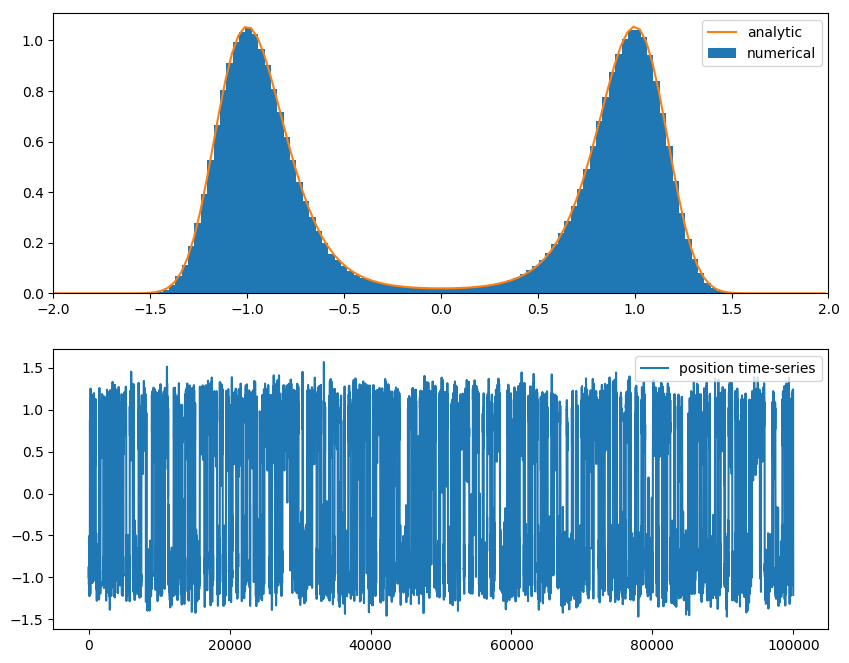

PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x161919b70>, PyObject <matplotlib.patches.Rectangle object at 0x161a71ef0>, PyObject <matplotlib.patches.Rectangle object at 0x161919f60>, PyObject <matplotlib.patches.Rectangle object at 0x1619134e0>, PyObject <matplotlib.patches.Rectangle object at 0x161913828>, PyObject <matplotlib.patches.Rectangle object at 0x161913b70>, PyObject <matplotlib.patches.Rectangle object at 0x161913eb8>, PyObject <matplotlib.patches.Rectangle object at 0x161913e80>, PyObject <matplotlib.patches.Rectangle object at 0x16406c588>, PyObject <matplotlib.patches.Rectangle object at 0x16406c8d0>, PyObject <matplotlib.patches.Rectangle object at 0x16406cc18>, PyObject <matplotlib.patches.Rectangle object at 0x16406cf60>, PyObject <matplotlib.patches.Rectangle object at 0x16406cf98>, PyObject <matplotlib.patches.Rectangle object at 0x164082630>, PyObject <matplotlib.patches.Rectangle object at 0x164082978>, PyObject <matplotlib.patches.Rectangle 

In [46]:
plot_diagnostics(H, P, subsample=1000)

In [59]:
compare_results(H, P; S0=S0)

crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 780
DNS mean(time to cross) = (crosses / nsteps) / dt    : 7.800e-03

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.280e+02
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 5.460e+01
exit time ratio DNS/ANA                              : 2.345e+00

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 7.812e-03
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 1.458e-03
exit rate ratio DNS/ANA                              : 5.360e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Dict{Any,Any} with 5 entries:
  :lam_dns    => 0.00781166
  :Etau_ana   => 54.5982
  :Etau_dns_1 => 0.0078
  :Etau_dns_2 => 128.014
  :lam_ana    => 0.00145751

In [75]:
taus = [0.5, 0.4, 0.3, 0.25, 0.225, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.145, 0.14, 0.135, 0.13]
Hs = Array{Hist}(undef, length(taus))
outs = Array{Dict}(undef, length(taus))
for z in zip(taus, 1:length(taus))
    t = z[1]
    i = z[2]
    P.tau = t
    @time H = integrator_fix(S0, nsteps; PP=P, CC=C, ut=:euler!, max_cross=Int64(1e5))
    Hs[i] = H
    out = compare_results(H, P; S0=S0)
    outs[i] = out
end

  1.087328 seconds (50.00 M allocations: 916.423 MiB, 17.27% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 5502
DNS mean(time to cross) = (crosses / nsteps) / dt    : 5.502e-02

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.817e+01
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 7.389e+00
exit time ratio DNS/ANA                              : 2.459e+00

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 5.504e-02
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 1.077e-02
exit rate ratio DNS/ANA                              : 5.111e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  0.908189 seconds (50.00 M allocations: 916.373 MiB, 11.16% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses  

  0.924628 seconds (50.00 M allocations: 916.298 MiB, 10.96% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses                                          : 55
DNS mean(time to cross) = (crosses / nsteps) / dt    : 5.500e-04

exit time ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-time mean(time to cross)                         : 1.782e+03
ANA-time E[tau] = e^(|V(qt) - V(q0)| / tau)          : 7.858e+02
exit time ratio DNS/ANA                              : 2.268e+00

exit rate ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS-rate mean(rate)                                  : 5.612e-04
ANA-rate lam = 1/(2pi*gam) e^(|V(qt) - V(q0)| / tau) : 1.013e-04
exit rate ratio DNS/ANA                              : 5.542e+00
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  0.996496 seconds (50.00 M allocations: 916.298 MiB, 11.77% gc time)
crosses ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
DNS crosses    

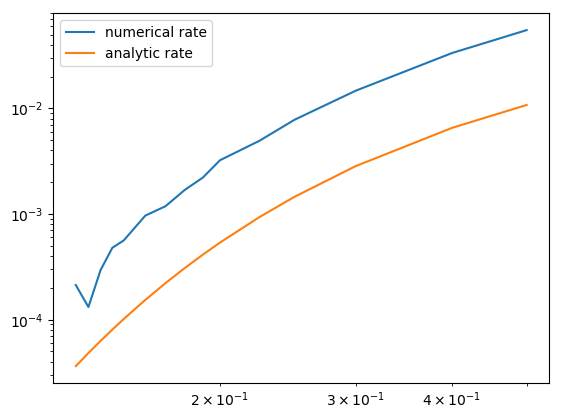

PyObject <matplotlib.legend.Legend object at 0x161968518>

In [81]:
loglog(taus, [outs[i][:lam_dns] for i = 1:length(taus)], label="numerical rate")
loglog(taus, [outs[i][:lam_ana] for i = 1:length(taus)], label="analytic rate")
legend()